In [1]:
graphics_toolkit('gnuplot')
pkg load interval
addpath(genpath('./octave-interval-examples/m'))

In [2]:
load Temp20200601.mat
t = therm(7:8, :);
line_1 = therm(7, :);
line_2 = therm(8, :);
s = size(line_1);
x = 1:s(2);


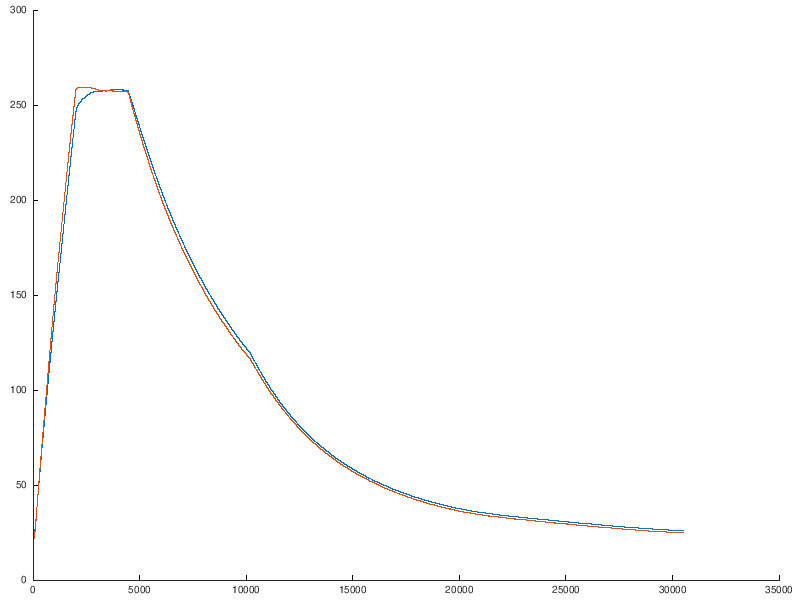

In [5]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
# plot([2000,2000], [0, 300])

Линейный участок примерно в [100, 2000]. Необходимо исследовать область линейности функций: определить этот участок точнее.

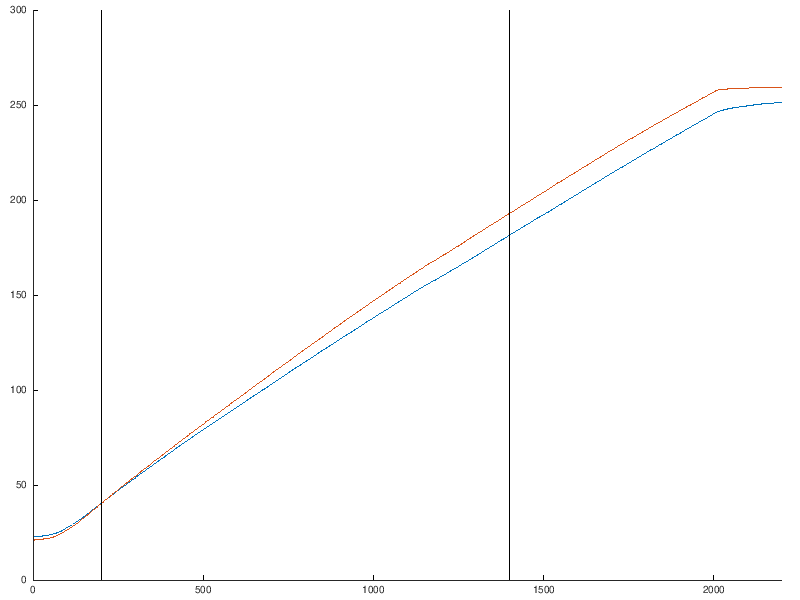

In [53]:
figure(1, 'position',[0, 0, 800, 600]);
%grid on
hold on
plot(x, line_1)
plot(x, line_2)
plot([200, 200], [0, 300], "k")
plot([1400,1400], [0, 300], "k")
xlim([0, 2200])

In [54]:
left_threshold = 500
right_threshold = 1000


data_1 = line_1(left_threshold:right_threshold);
data_2 = line_2(left_threshold:right_threshold);
indexes = x(left_threshold:right_threshold);

left_threshold =  500
right_threshold =  1000


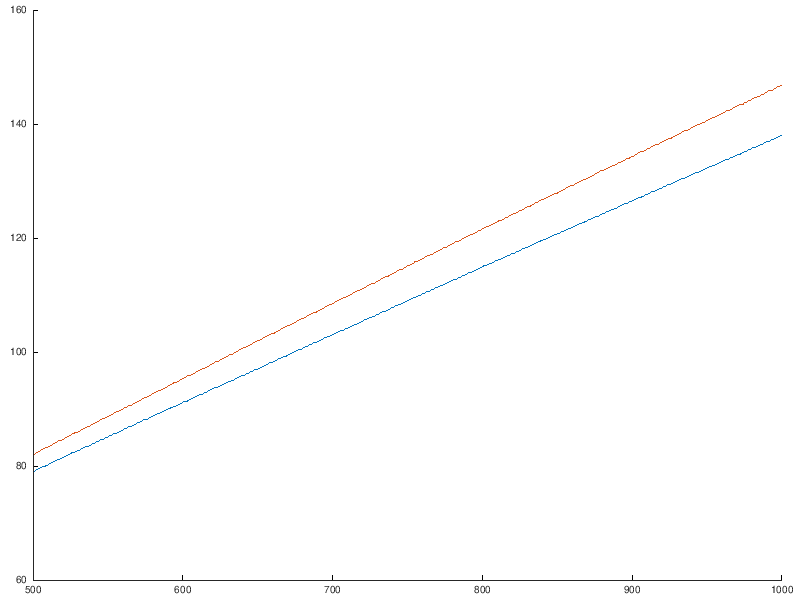

In [55]:
figure(1, 'position',[0, 0, 800, 600]);
hold on
plot(indexes, data_1)
plot(indexes, data_2)

n =  10
start_i =  1
step =  40
end_i =  400
inds =

     1    41    81   121   161   201   241   281   321   361



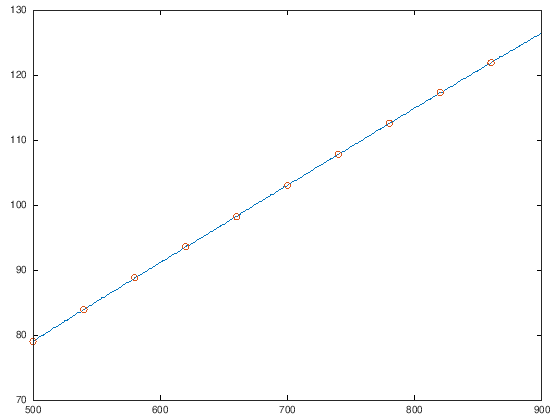

In [56]:
n = 10
start_i = 1
step = 40
end_i = n*step
inds = [start_i:step:end_i]

figure
plot(indexes(start_i:end_i), data_1(start_i:end_i), "-")
hold on
plot(indexes(inds), data_1(inds), "o")

In [49]:
## Определить задачу построения интервальной регрессии 
##     y = X * beta = beta1 + beta2 * x 
## с ограничением beta2 >= 0

x = indexes(inds);        
y = data_1(inds);        

epsilon = zeros(1, n) + 0.1;  



x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));

X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);  

display(x)
display(y)
display(epsilon)

x =

   400   459   518   577   636   695   754   813   872   931

y =

 Columns 1 through 8:

    66.60    74.00    81.20    88.30    95.40   102.50   109.50   116.40

 Columns 9 and 10:

   123.30   130.10

epsilon =

 Columns 1 through 8:

   0.1000   0.1000   0.1000   0.1000   0.1000   0.1000   0.1000   0.1000

 Columns 9 and 10:

   0.1000   0.1000



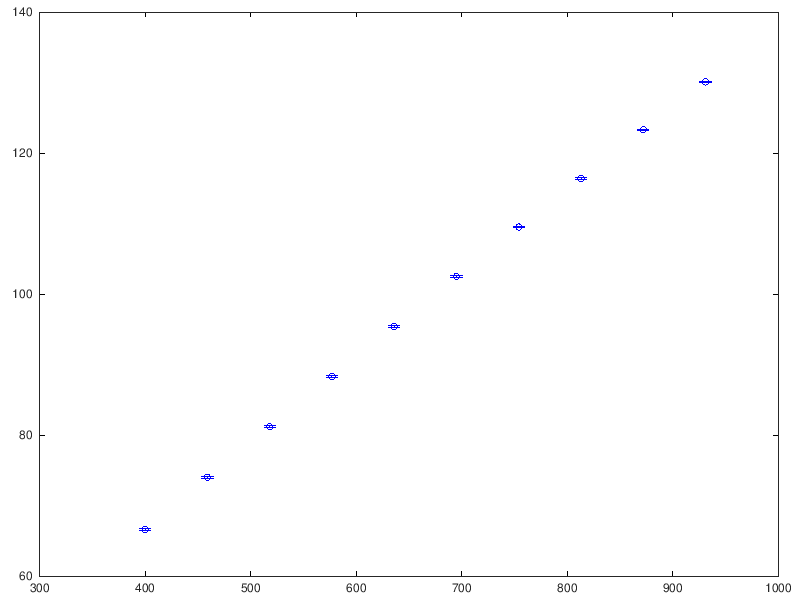

In [50]:
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
set(gca, 'fontsize', 12)


Можно добавить график обычной МНК регрессии

b_lsm =

   19.12937    0.11816



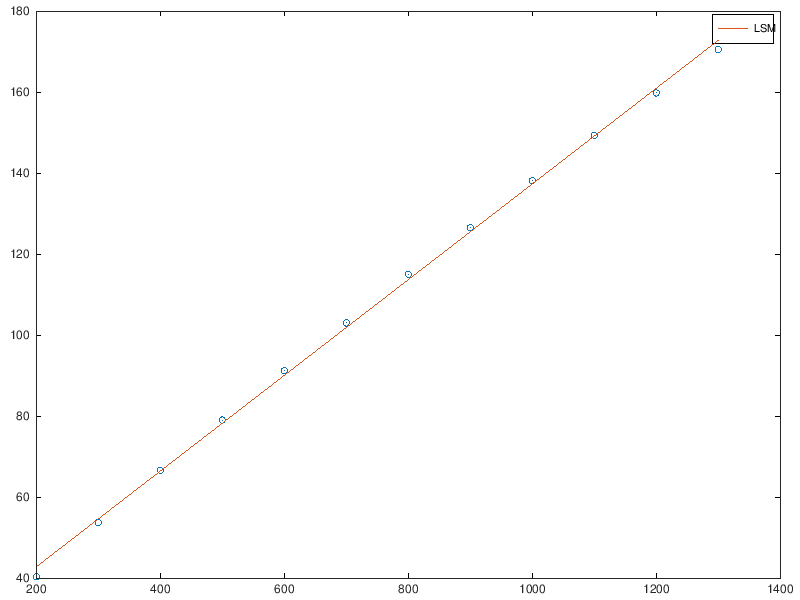

In [14]:
## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];


figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
set(gca, 'fontsize', 12)

legend("", "LSM")


QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2019.1 2019/06/21:
  run-id 1890945292  qh_QHpointer  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


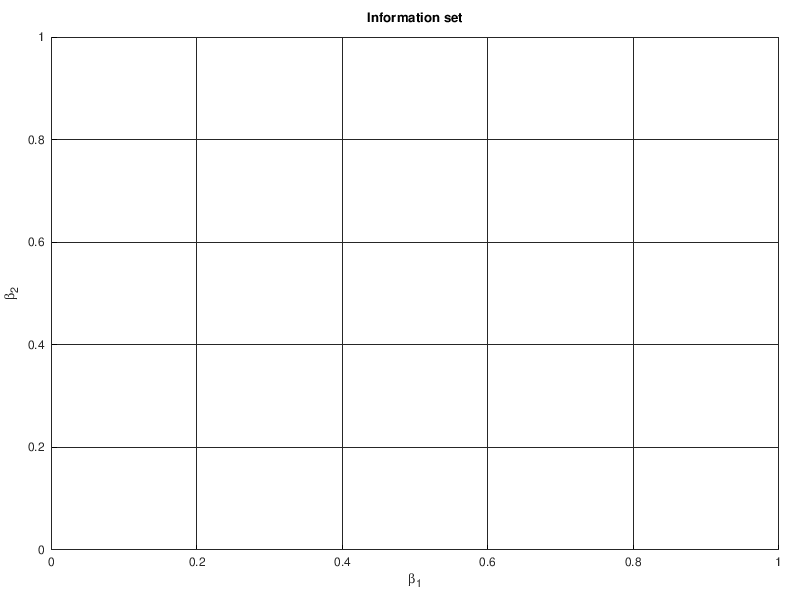

In [15]:
## Информационное множество
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

In [46]:
function [w] = linear(epsilon, x, y)
    eps = epsilon;
    m = size(x)(1)
    C = zeros(1, m + 2);
    for i = 1:m
    C(i) = 1;
    end
    % display(C)
    A = zeros(2*m, m+2);

    for i = 1:m
    A(2 * i - 1, i) = eps(i);
    A(2 * i, i) = eps(i);

    A(2 * i - 1, m + 1) = 1;
    A(2 * i, m + 1) = -1;

    A(2 * i - 1, m + 2) = x(i);
    A(2 * i, m + 2) = -x(i);

    end

    % display(A)

    B = zeros(1, 2*m);
    for i = 1:m
    B(2 * i - 1) = y(i);
    B(2 * i) = -y(i);
    end

    % display(B)

    lb = zeros(1, m+2);
    for i = 1:m
    lb(i) = 1;
    end

    lb(m+2) = -inf;

    % display(lb)

    ctype = "";
    for i = 1:2 * m
    ctype(i) = 'L';
    end

    % display(ctype);

    vartype = "";
    for i = 1:m + 2
    vartype(i) = 'C';
    end

    % display(vartype);

    sense = 1;
    output_precision(4)
    w = glpk(C,A,B,lb,[],ctype,vartype,sense)
endfunction

##### Решение ЗЛП

In [6]:
linear(epsilon, x, y)

error: 'epsilon' undefined near line 1 column 8


## Повторные решения задачи с удалением выбросов

In [4]:
function [x, indexes, data_1] = prep_data(line_1, left_threshold, right_threshold)
    s = size(line_1);
    x = 1:s(2);
    data_1 = line_1(left_threshold:right_threshold);
    indexes = x(left_threshold:right_threshold);
endfunction


n =  8
inds =

    60   119   178   237   296   355   414   473

inds =

    60   119   178   237   296   355   414   473

m =  8
w =

    1.0000
    1.0000
    1.0000
    1.0000
    1.3333
    1.0000
    1.0000
    2.6667
   19.1237
    0.1198

b_lsm =

   19.3571    0.1194

QH6412 qhull input error (qh_initqhull_globals): expecting between 1 and 2147483631 points.  Got 0 0-d points

While executing:  | qhull Qt
Options selected for Qhull 2019.1 2019/06/21:
  run-id 3045760  qh_QHpointer  Qtriangulate  _maxoutside  0
error: convhulln: qhull failed
error: called from
    ir_beta2poly at line 77 column 5
    ir_plotbeta at line 59 column 10


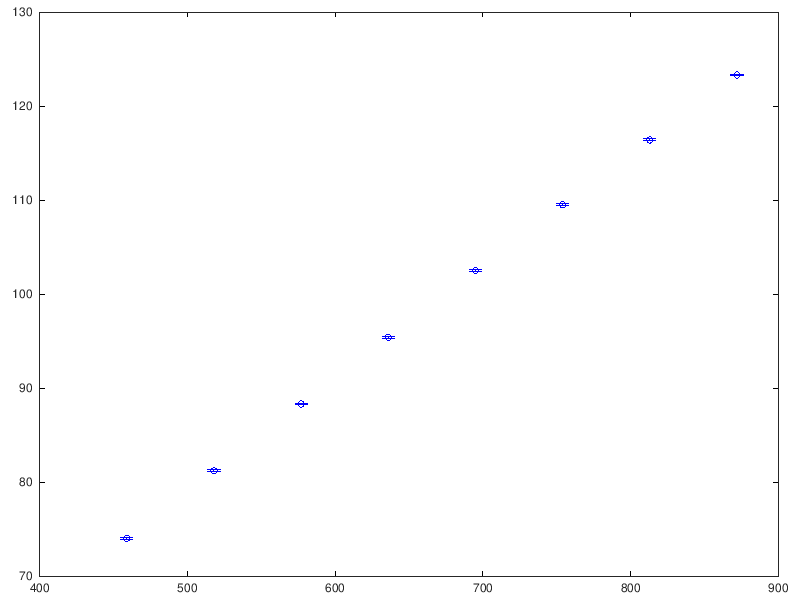

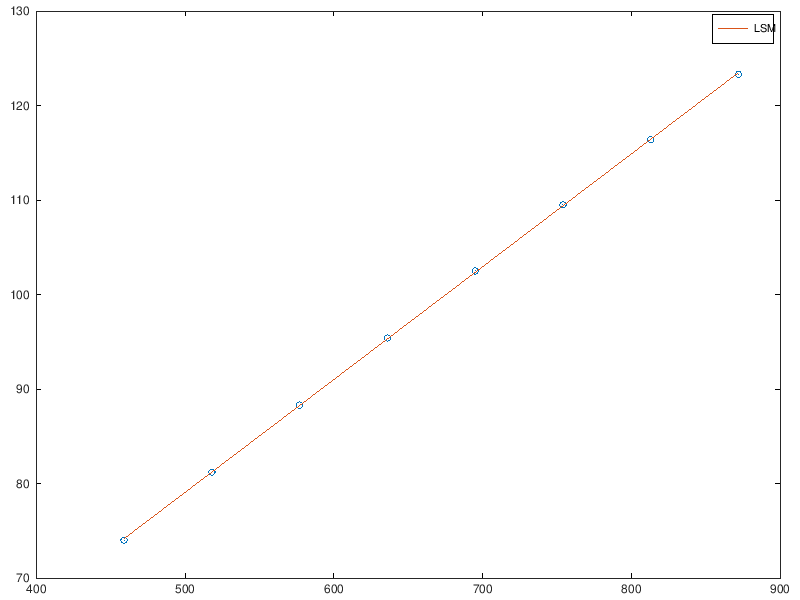

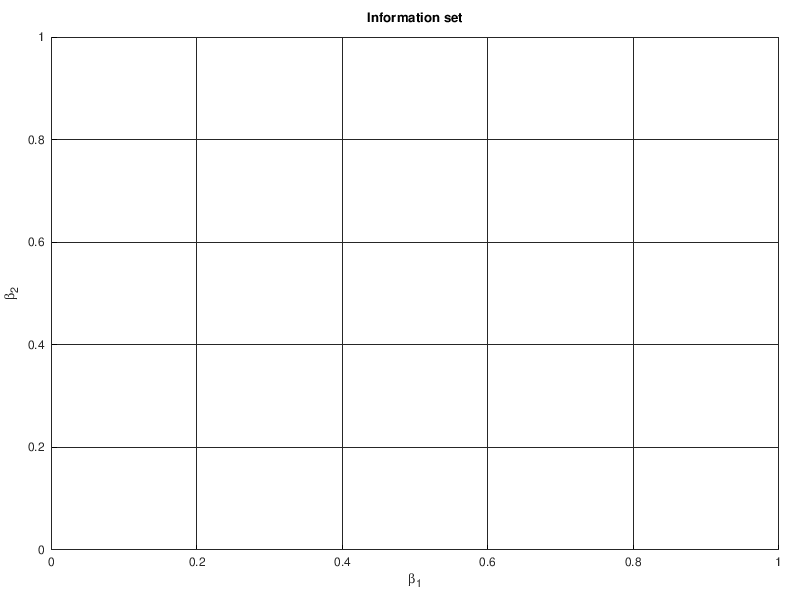

In [82]:
left_threshold = 400
right_threshold = 1000

[x, indexes, data_1] = prep_data(line_1,left_threshold, right_threshold);

n = 10;
start_i = 1;
step = floor((right_threshold - left_threshold - start_i) / n);
end_i = n * step;
inds = [start_i:step:end_i];
n = 8
inds = inds(:,2:9)
display(inds)

x = indexes(inds);        
y = data_1(inds);        

epsilon = zeros(1, n) + 0.1; 
x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));
eps = epsilon;


X = [ x.^0 x ];                              
lb = [-inf 0];                                
irp_temp = ir_problem(X, y, epsilon, lb);

% display(x)
% display(y)
% display(epsilon)

# ЗЛП
w = linear(epsilon, x, y);
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
set(gca, 'fontsize', 12)

## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];



figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
plot([min(x),  max(x)], MNK_line)
set(gca, 'fontsize', 12)

legend("", "LSM")

## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

#### Коридор совместных зависимостей

scale =  2.667
x =

   459
   518
   577
   636
   695
   754
   813
   872

y =

    74.00
    81.20
    88.30
    95.40
   102.50
   109.50
   116.40
   123.30

eps =

   0.2667
   0.2667
   0.2667
   0.2667
   0.2667
   0.2667
   0.2667
   0.2667



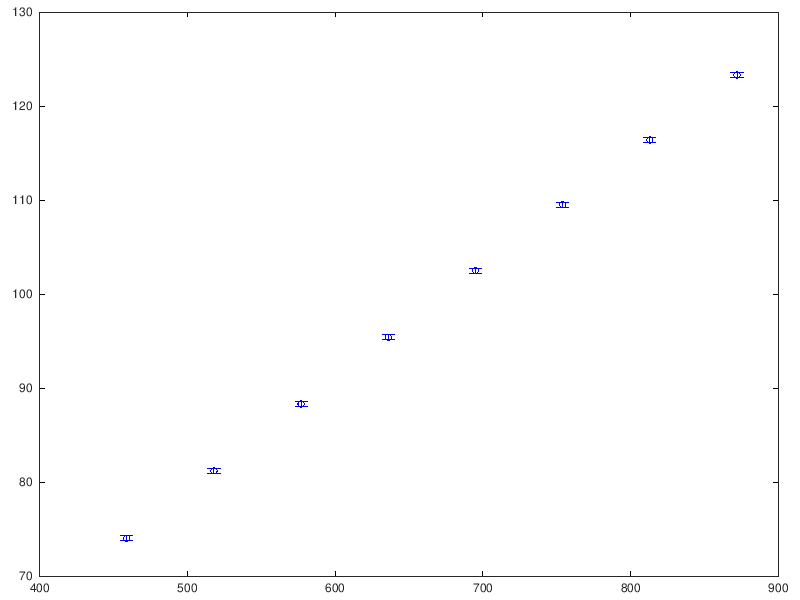

In [83]:
scale = max(w(1:n))
for i = 1:n
    eps(i) = epsilon(i) * scale;
end

X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf 0];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, eps, lb);    # создание переменной, содержащей описание задачи 


## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');


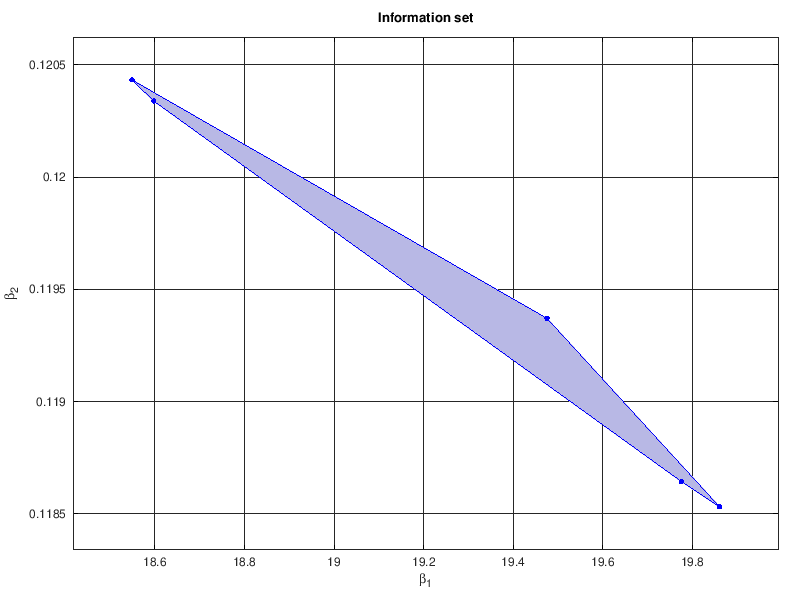

In [84]:
## Информационное множество
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')


In [85]:
## Вершины информационного множества задачи построения интервальной регрессии
vertices = ir_beta2poly(irp_temp)

## Диаметр и наиболее удаленные вершины информационного множества 
[rhoB, b1, b2] = ir_betadiam(irp_temp)

vertices =

   19.4756    0.1194
   18.5490    0.1204
   18.5977    0.1203
   18.5978    0.1203
   19.7757    0.1186
   19.8609    0.1185

rhoB =  1.312
b1 =

   19.8609    0.1185

b2 =

   18.5490    0.1204



In [86]:
## Внешние интервальние оценки параметров модели y = beta1 + beta2 * x 
b_int = ir_outer(irp_temp)

b_int =

   18.5490   19.8609
    0.1185    0.1204



In [87]:
## Точечные оценки параметров 
b_maxdiag = (b1 + b2) / 2    # как середина наибольшей диагонали информационного множества

b_gravity = mean(vertices)   # как центр тяжести информационного множества 

b_lsm = (X \ y)'             # методом наименьших квадратов

b_maxdiag =

   19.2049    0.1195

b_gravity =

   19.1428    0.1196

b_lsm =

   19.3571    0.1194



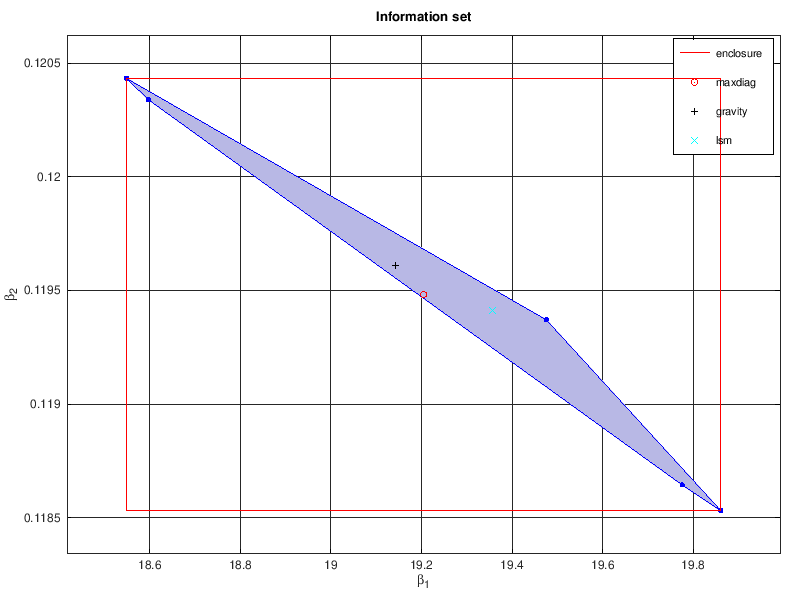

In [88]:
## Внешняя интервальная оценка информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
hold on
ir_plotrect(b_int,'r-')
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

## Точечные оценки
plot(b_maxdiag(1), b_maxdiag(2), 'ro')
plot(b_gravity(1), b_gravity(2), 'k+')
plot(b_lsm(1), b_lsm(2), 'cx')
legend("", "", "enclosure", "maxdiag",  "gravity", "lsm")


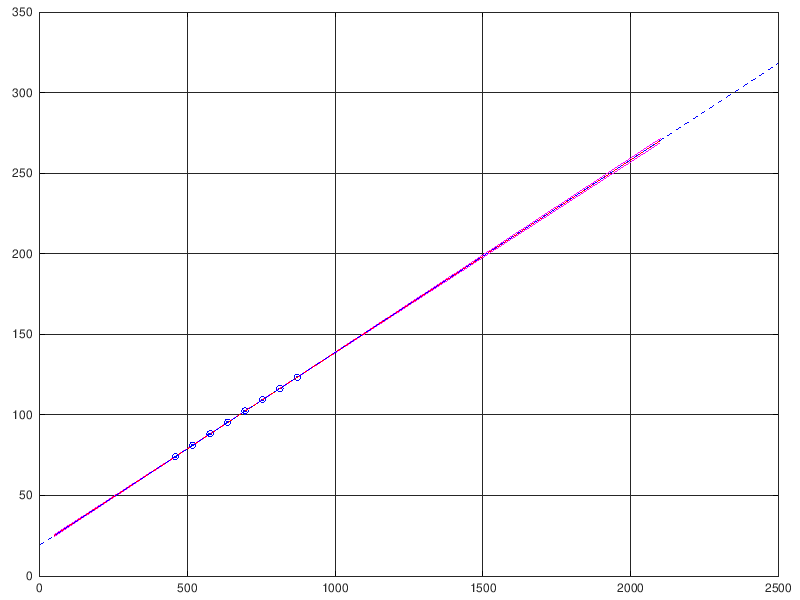

In [89]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [50 2100];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

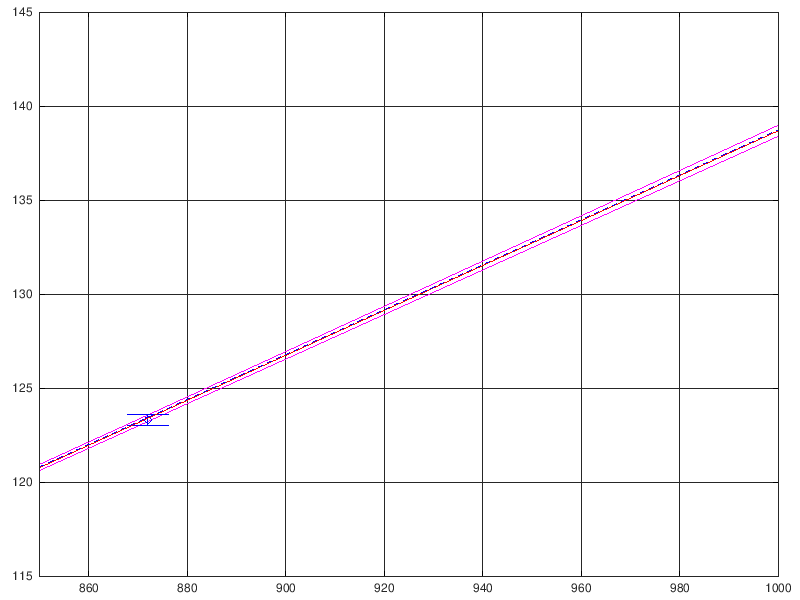

In [90]:
## Коридор совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

xlim([850, 1000])
ylim([115, 145])

### Предсказание значений функции

In [91]:
## Значения функции, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
yp0 = ir_predict(irp_temp, X)       # интервальный прогноз значений y в точках x

yp0mid = mean(yp0,2)                 # средние значения прогнозных интервалов
yp0rad = 0.5 * (yp0(:,2) - yp0(:,1)) # радиус прогнозных интервалов

yp0rad_rel = 100 * yp0rad ./ yp0mid  # относительная величина неопределенности прогнозов в процентах

yp0 =

    73.83    74.27
    80.93    81.31
    88.03    88.35
    95.13    95.40
   102.23   102.44
   109.23   109.48
   116.23   116.52
   123.22   123.57

yp0mid =

    74.05
    81.12
    88.19
    95.26
   102.34
   109.36
   116.38
   123.39

yp0rad =

   0.2194
   0.1881
   0.1595
   0.1310
   0.1024
   0.1238
   0.1486
   0.1733

yp0rad_rel =

   0.2964
   0.2319
   0.1809
   0.1375
   0.1000
   0.1132
   0.1277
   0.1405



In [92]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках наблюдения неопределенности 
xp = [200; 450; 600; 900; 1600]      # точки наблюдения
Xp = [xp.^0 xp];
output_precision(4)

yp = ir_predict(irp_temp, Xp)         # интервальный прогноз значений y в точках xp
ypmid = mean(yp,2)                     # средние значения прогнозных интервалов
yprad = 0.5 * (yp(:,2) - yp(:,1))      # радиус прогнозных интервалов

yprad_relative = 100 * yprad ./ ypmid  # относительная величина неопределенности прогнозов в процентах

xp =

    200
    450
    600
    900
   1600

yp =

    42.64    43.57
    72.74    73.20
    90.80    91.10
   126.54   126.94
   209.51   211.24

ypmid =

    43.10
    72.97
    90.95
   126.74
   210.38

yprad =

   0.4658
   0.2280
   0.1484
   0.2000
   0.8657

yprad_relative =

   1.0806
   0.3125
   0.1631
   0.1578
   0.4115



### Граничные точки

In [93]:
# Поиск граничных точек
MY_EPS = 0.00001;
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
irp_temp;
cur_x = irp_temp.y;
cur_eps = irp_temp.epsilon;

yp0 = ir_predict(irp_temp, X); 

for i = 1:n
x_top = cur_x(i) + cur_eps(i);
x_bot = cur_x(i) - cur_eps(i);

y_top = yp0(i, 2);
y_bot = yp0(i, 1);

if abs(y_top - x_top) < MY_EPS
    display(i)
    
end

if abs(y_bot - x_bot) < MY_EPS
    display(i)
end


end



i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  8


m =  8


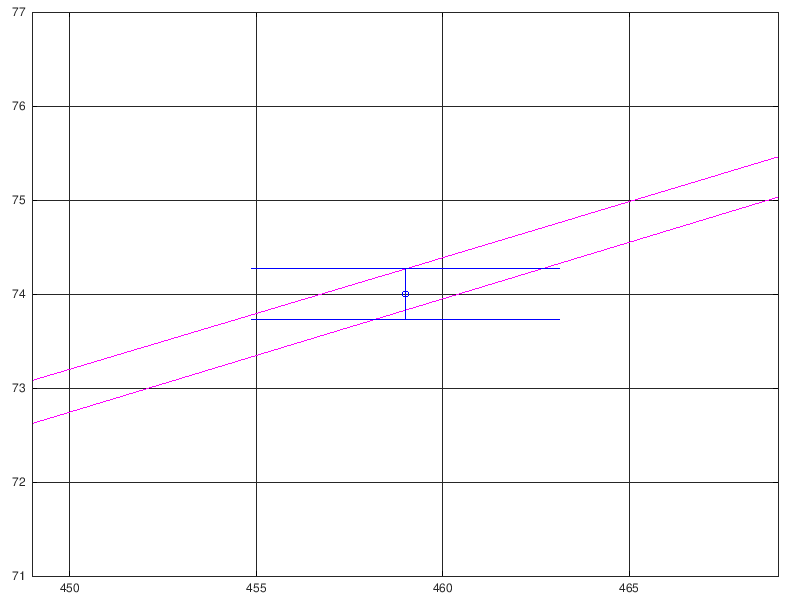

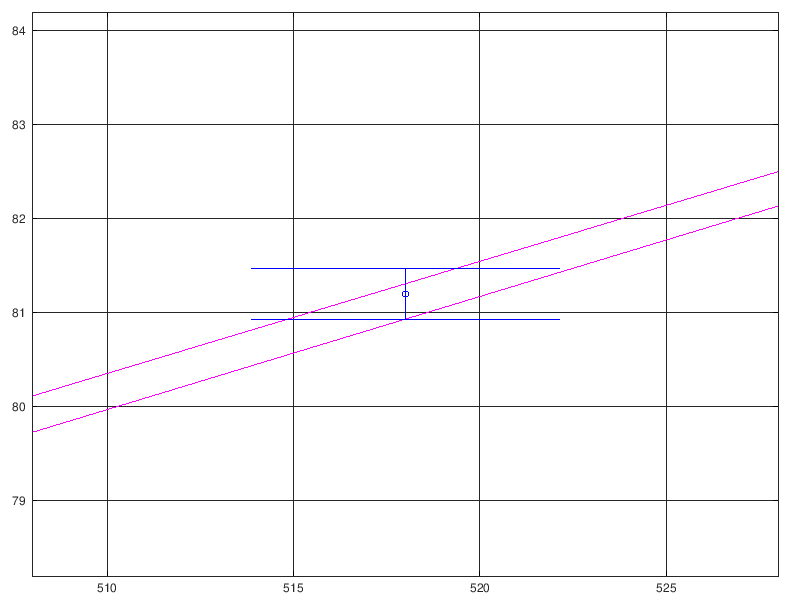

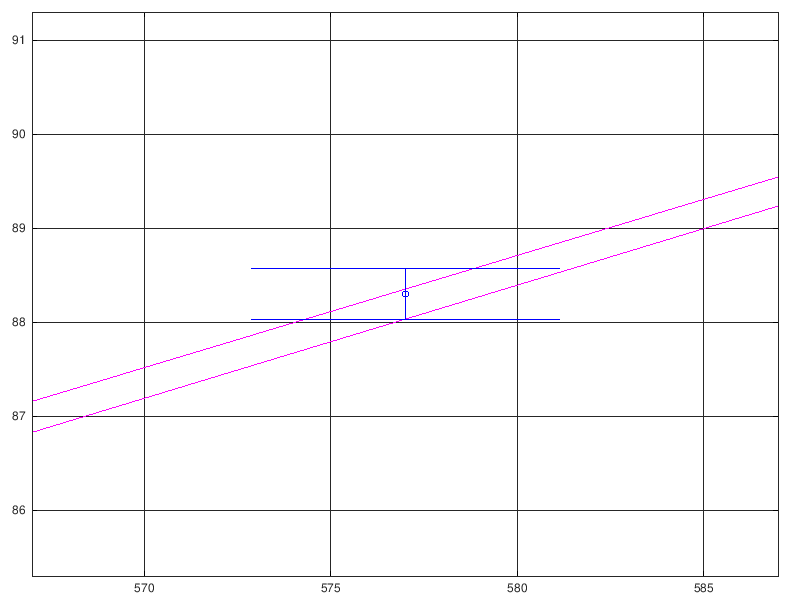

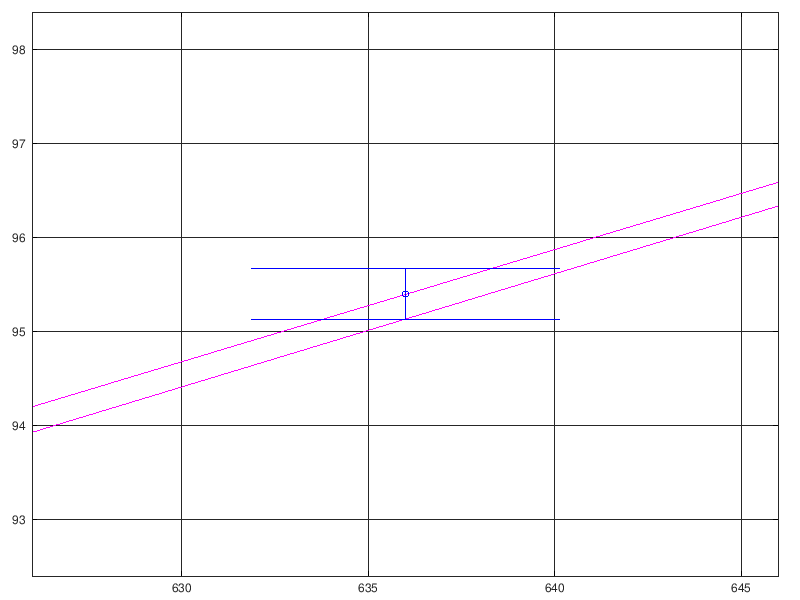

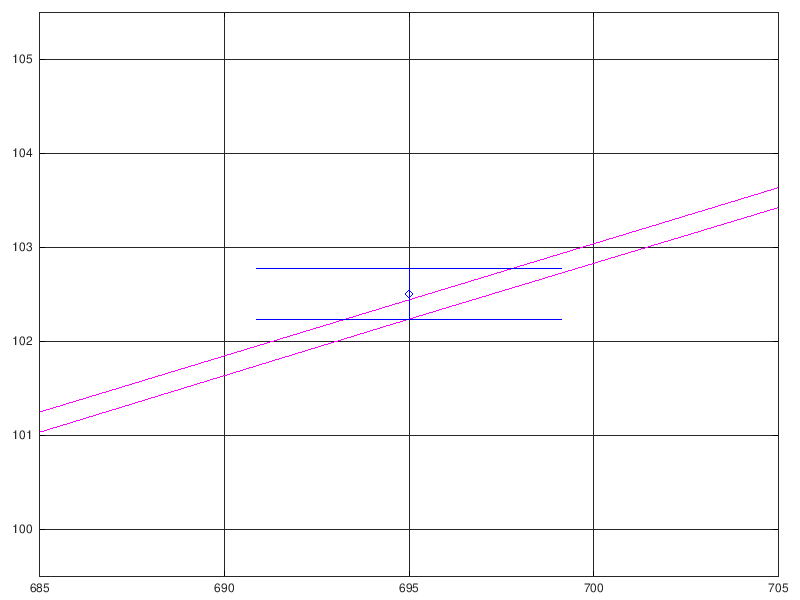

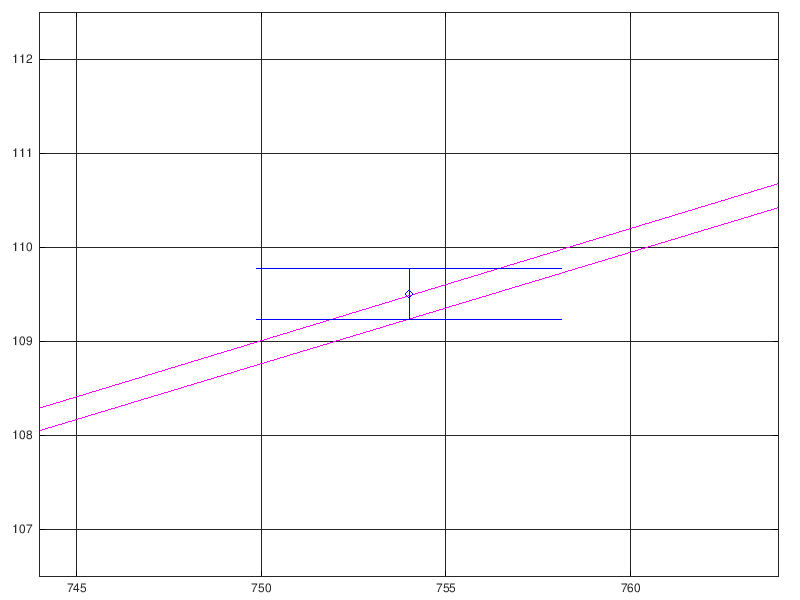

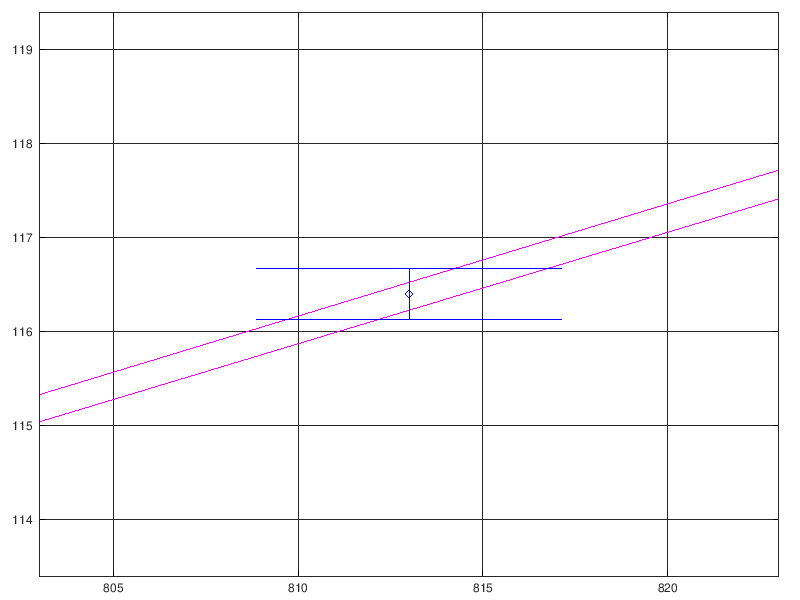

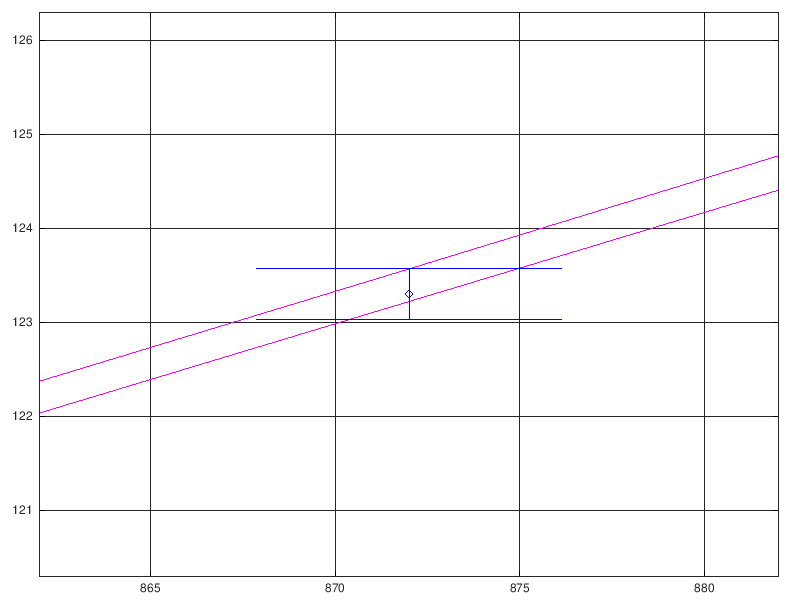

In [94]:
# Граничные точки, графики 
border_x = [-10, 10];
border_y = [-3, 3];
m = n
for i = 1:m

cur_point_x = x(i);
cur_point_y = y(i);

figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей
hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
grid on
set(gca, 'fontsize', 12)

xlim([cur_point_x + border_x(1), cur_point_x + border_x(2)]);
ylim([cur_point_y + border_y(1), cur_point_y + border_y(2)]);


end